### 0. Load libraries and custom functions
* If files are not available for plotting, please run get_data.ipynb to download/generate the files.

In [1]:
from functions import plot_total_trips_interactive, plot_trips_per_month_interactive, plot_on_map_interactive,\
                    plot_socio_on_map, plot_taxi_socio_interactive, create_heatmap, create_interactive_taxi_socio

import ipywidgets as widgets

# Initialize column variables for interactive plots.
taxi_cols = [
    'total_trip_count', 'PU_minute_per_mile', 'DO_minute_per_mile',
    'total_passenger_count', 'total_trip_distance (mile)',
    'total_fare', 'total_congestion_surcharge', 'total_airport_fee', 'total_duration (min)',
    'average_passenger_count', 'average_trip_distance (mile)', 'average_fare',
    'average_congestion_surcharge', 'average_airport_fee', 'average_duration (min)']

socio_cols = [
    'Population',
    'Disabled population',
    'Foreign-born population',
    'Population aged 65+',
    'Median household income (2021$)',
    'Poverty rate',
    'Labor force participation rate',
    'Population aged 25+ without a high school diploma',
    'Unemployment rate',
    'Severely rent-burdened households',
    'Homeownership rate',
    'Severe crowding rate (% of renter households)',
    'Population density (1,000 persons per square mile)',
    'Car-free commute (% of commuters)',
    'Mean travel time to work (minutes)',
    'Serious crime rate (per 1,000 residents)']

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### 1. Plot the following to see trends and patterns in taxi trips in Jan-Jun 2022:
- total and monthly trip count for each day of the month
- total and monthly trip count for each hour or the day
- total and monthly trip count for each weekday
- total trip count for each borough

In [ ]:
m = widgets.interactive(plot_total_trips_interactive, pickup_or_dropoff = ["Pickup", "Dropoff"])
display(m)

#### Findings:
- Taxi rides are quite evenly spread throughout the months; no distinct or interesting trends in taxi rides for each day of the month.
- Peak time for taxi rides appears to be around 6pm.
- Slightly fewer taxi rides on Monday and Sunday.
- Trip counts are lower in January and February, probably due to more tightened covid restrictions at the time.
- Around 90% of taxi rides started or ended in Manhattan; almost 99% of taxi rides were picked up in Manhattan and Queens, and there were slightly more drop-offs in Brooklyn compared to pick-ups.

### 2. Create similar plots as above but for each month in Jan-Jun 2022 as a GIF file.

In [ ]:
m = widgets.interactive(plot_trips_per_month_interactive, pickup_or_dropoff = ["Pickup", "Dropoff"])
display(m)

![PU_trip_counts_per_month.gif](data/png/PU_trip_counts_per_month.gif)

![DO_trip_counts_per_month.gif](data/png/DO_trip_counts_per_month.gif)

#### Findings:
- Cyclic trends in trip count for each day of the month; the cycle appears to be a week.
- Little changes over time in trip count for each hour of the day - peak time after ordinary working hours.
- There were some variations over time in trip count for each weekday but there were generally fewer taxi rides on Monday and Sunday.
- In all months, the vast majority of the taxi rides happened in Manhattan.

### 3. Plot sum and average of passenger count, total fare, congestion charge, airport fee, duration, trip distance, minute per mile, and total trip count for each CDTA on the map of NYC.

In [3]:
m = widgets.interactive(plot_on_map_interactive,
                        exclude_manhattan = [False, True])
display(m)

interactive(children=(Dropdown(description='exclude_manhattan', options=(False, True), value=False), Output())…

#### Findings:
- Due to a significantly higher number of trip counts in Manhattan (about 90% of all taxi trips happened from or to Manhattan), all the "total" variables do not seem quite useful in understanding how taxi trips differ in different boroughs and community districts.
- CDTAs with airports, namely JFK International Airport (QN83, ranked 9) and LaGuardia Airport (QN80), were ranked high in most of the total variables.
- Passenger count per trip (i.e. average passenger count) was quite equally distributed across different regions, with the range between 1.2 and 1.7. Interestingly though, the top 6 CDTAs have either a part or an airport.
- It appears that trips from or to Staten Island tend to be longer and more expensive.
- Not surprisingly, the total and average congestion surcharge were higher in Manhattan, followed by the districts with airports and the districts neighboring Manhattan.
- Distribution of minute per mile based on pickup and dropoff locations look quite different and there was an outlier in pickup minute per mile, which was Bay Ridge-Dyker Heights (BK10) with the value of 2.269505. Also, the variable didn't seem to be correlated with congestion (or congestion surcharge); longer minutes per mile were expected in the areas with frequent traffic congestion.
\* Plots look very similar whether it's based on pickup or dropoff location, except for minute per mile. For this reason, each of the pickup and dropoff variables, excluding minute per mile, will be averaged and combined as a single variable in later analyses.

### 4. Plot a similar small multiple as above, but using socioeconomic data instead of taxi trip data.

cdta_df loaded from c:\Users\Admin\Documents\GitHub\NYC-Transportation-and-Socioeconomic-Data-Analysis\taxi\data\cdta_df.


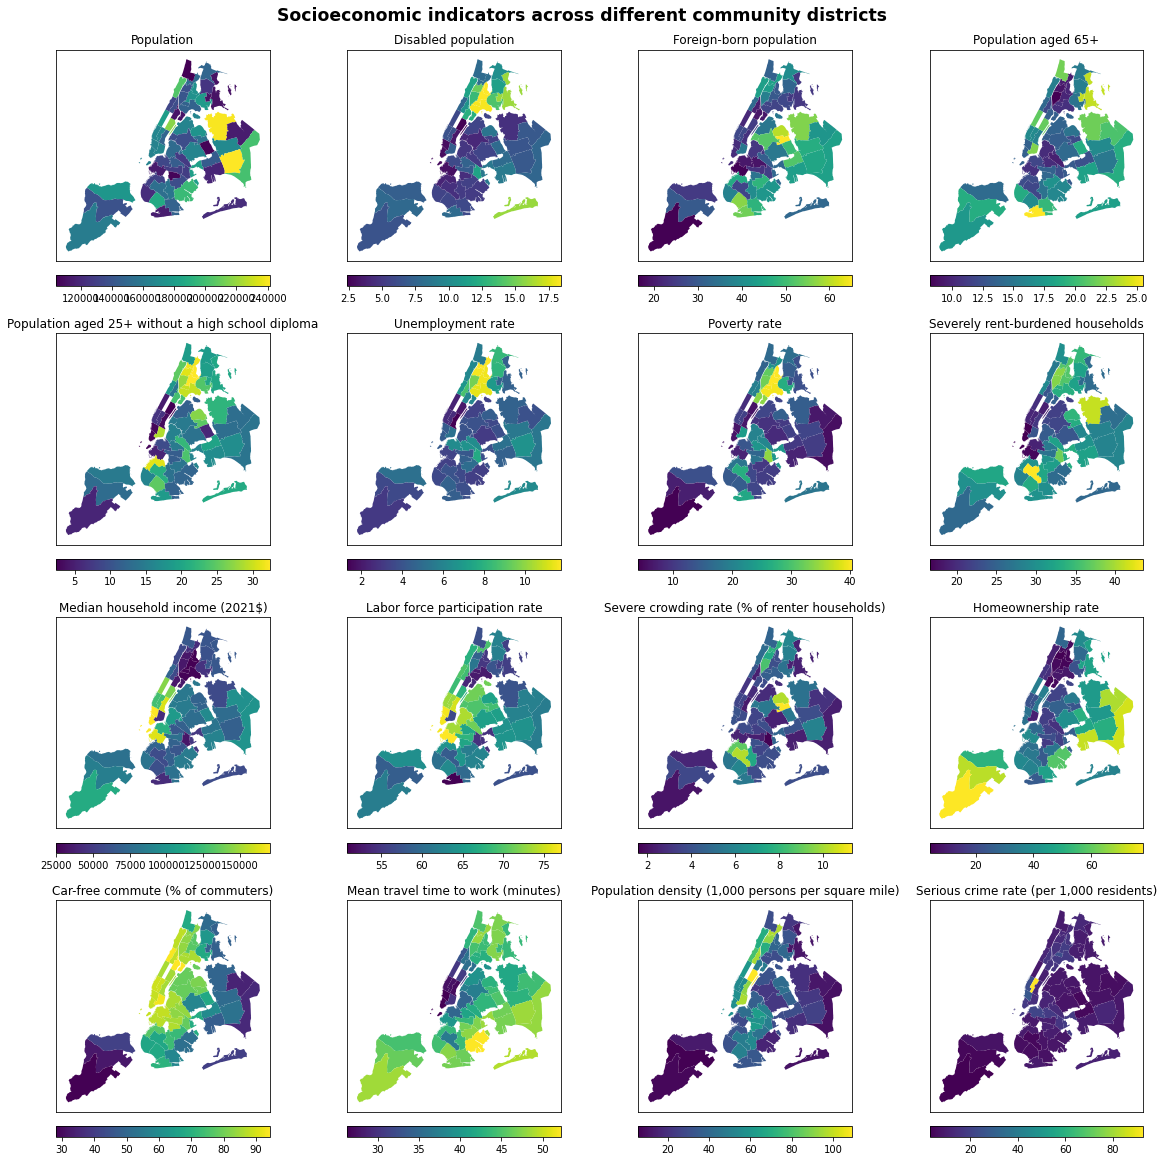

In [2]:
plot_socio_on_map()

#### Findings:
- Some districts in Bronx have higher proportions of disabled population and population aged 25+ without a high school diploma, and higher unemployment and poverty rates, which might be all connected.
- The choropleths for median household income and labor force participation rate look quite similar, meaning they are highly correlated.
- Homeownership rates are higher in Staten Island and Queens, where severe crowding rates are relatively lower.
- Car-free commute rates are generally higher in Manhattan, where mean travel time to work is a lot shorter than in other boroughs.
- Population densities seem to be higher in Manhattan and Bronx.- Midtown-Flatiron-Union Square (MN05) has a significantly higher serious crime rate.

### 5. Plot a heatmap based on correlation matrix to see how each of the taxi and socio variables are correlated.

In [2]:
m = widgets.interactive(create_heatmap,
                        variable=taxi_cols+socio_cols,
                        top_n=range(5, 35, 5),
                        show_highly_correlated_varaibles=[True, False])
display(m)

interactive(children=(Dropdown(description='variable', options=('total_trip_count', 'PU_minute_per_mile', 'DO_…

#### Findings:
<ul>
<li>High correlation coefficients among the taxi trip variables all make sense (e.g. more trips led to more passengers in total) but are not particularly meaningful or interesting.
<li>Similarly, many correlations among socioeconomic variables also naturally make sense, such as the following:<br>
<blockquote style=”border:none”>Disabled population, Poverty rate                                                                     (0.738193)<br>
Disabled population, Unemployment rate                                                                (0.773479)<br>
Median household income (2021$), Labor force participation rate                                       (0.766551)<br>
Median household income (2021$), Population aged 25+ without a high school diploma                   (-0.852913)<br>
Median household income (2021$), Poverty rate                                                        (-0.761165)<br>
Median household income (2021$), Severely rent-burdened households                                   (-0.766694)<br>
Population aged 25+ without a high school diploma, Severely rent-burdened households                  (0.722397)<br>
Population aged 25+ without a high school diploma, Unemployment rate                                  (0.704184)<br>
Poverty rate, Homeownership rate                                                                     (-0.713973)<br>
Poverty rate, Population aged 25+ without a high school diploma                                       (0.750379)<br>
Poverty rate, Unemployment rate                                                                       (0.769103)<br>
</blockquote>
<li>In general, taxi trip variables and socioeconomic variables are not correlated with each other, except for car-free commute rate and mean travel time to work that are highly correlated with some of the taxi trip variables, which seem natural.
<li>Total trip count and mean travel time to work are highly correlated in opposite directions, meaning more taxi trips happened where people tend to spend less time getting to work. However, it's not possible to know whether people take taxis to get to work from the data we have.
<li>Population density and car-free commute are highly correlated. It might be because people can commute on foot, by bicycle or motorcycle in highly populated districts.<br>
<li>Homeownership rate and car-free commute show a strong inverse, or negative, correlation. It might be because homeowners tend to get to work by car.
</ul>

### 6. Plot each of the taxi and socio variables at the same time interactively.

In [4]:
m = widgets.interactive(plot_taxi_socio_interactive,
                        taxi_col=taxi_cols,
                        socio_col=socio_cols,
                        top_n=range(5, 80, 5))
display(m)

interactive(children=(Dropdown(description='taxi_col', options=('total_trip_count', 'PU_minute_per_mile', 'DO_…

#### Findings:
- MN05 - highest total trip count and highest serious crime rate


### 7. Create a similar choropleth but with interactive tooptips for each CDTA/CD.

In [3]:
m = widgets.interactive(create_interactive_taxi_socio, taxi_col=taxi_cols, socio_col=socio_cols)
display(m)

interactive(children=(Dropdown(description='taxi_col', options=('total_trip_count', 'PU_minute_per_mile', 'DO_…